In [1]:
import re

In [2]:
p=re.compile('ab*')

In [3]:
p

re.compile(r'ab*', re.UNICODE)

In [6]:
p=re.compile('[a-z]+')
p.match('ab3ab')

<re.Match object; span=(0, 2), match='ab'>

In [7]:
p.match('db')

<re.Match object; span=(0, 2), match='db'>

In [9]:
#문자열 처음부터 시작하여 같은 모양 있는지 확인
m=p.match('tempo')
m

<re.Match object; span=(0, 5), match='tempo'>

In [10]:
m.group()

'tempo'

In [12]:
m.start()

0

In [13]:
m.end() #span=중 둘째자리 숫자

5

In [14]:
m.span()

(0, 5)

In [15]:
print(p.match('     message'))

None


In [17]:
m=p.search("              message 454 absfg")
print(m)

<re.Match object; span=(14, 21), match='message'>


In [18]:
m.group()

'message'

In [19]:
m.span()

(14, 21)

In [20]:
m.end()

21

In [22]:
m.start()

14

In [23]:
p=re.compile('[a-z]+')
m=p.match('string goes here')
m

<re.Match object; span=(0, 6), match='string'>

In [ ]:
if m:
    print('match found',m.group())
    

In [31]:
p=re.compile(r'\d+')
p.findall('12 drummers drumming,11 pipers piping, 10 lords a-leaping')

['12', '11', '10']

In [32]:
iterator=p.finditer('12 drummers drumming,11 pipers piping, 10 lords a-leaping')
list(iterator)

[<re.Match object; span=(0, 2), match='12'>,
 <re.Match object; span=(21, 23), match='11'>,
 <re.Match object; span=(39, 41), match='10'>]

In [52]:
for match in iterator:
    print(match.span())

In [37]:
import re
text='에러 1122:레퍼런스 오류\n 에러 1033:아규먼트 오류'
regex=re.compile('에러 1033')
regex

re.compile(r'에러 1033', re.UNICODE)

In [40]:
mo=regex.search(text)
mo

<re.Match object; span=(17, 24), match='에러 1033'>

In [42]:
import re
text='문의 사항이 있으면 020-3456-1236으로 전화주세요'
regex=re.compile(r'\d\d\d-\d\d\d\d-\d\d\d\d')
regex

re.compile(r'\d\d\d-\d\d\d\d-\d\d\d\d', re.UNICODE)

In [51]:
import re
text='문의 사항이 있으면 020-3456-1236으로 전화주세요'
regex=re.compile(r'(\d{3})-(\d{3}-\d{4})')
mo=regex.search(text)
print(mo)

print(mo.group(1))
print(mo.group(2))
print(mo.group())

None


AttributeError: 'NoneType' object has no attribute 'group'

In [54]:
import re
p=re.compile('\d[2]')
print(p)
test_1=p.findall()

re.compile('\\d[2]')


TypeError: findall() missing required argument 'string' (pos 1)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
frame=pd.read_csv("C:/Users/ASIA_08/seoul_crime_2015.csv",encoding='CP949')

In [87]:
frame.head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [61]:
frame.tail()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
26,노원서,10,10,7,7,197,121,"2,193",801,"2,723","2,329"
27,방배서,1,2,1,1,59,56,653,186,547,491
28,은평서,1,1,7,5,96,82,"1,095",418,"1,461","1,268"
29,도봉서,3,3,9,10,102,106,"1,063",478,"1,487","1,303"
30,수서서,10,7,6,6,149,124,"1,439",666,"1,819","1,559"


In [62]:
frame.describe()

,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거)
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,5.258065,4.935484,8.903226,8.161290,175.774194,131.967742
std,3.605253,3.203493,4.935280,5.710206,85.580259,56.590037
min,1.000000,0.000000,1.000000,1.000000,59.000000,46.000000
25%,3.000000,2.500000,6.000000,4.000000,103.500000,90.000000
50%,4.000000,4.000000,8.000000,7.000000,154.000000,124.000000
75%,7.500000,7.500000,13.000000,11.500000,251.000000,175.500000
max,14.000000,12.000000,22.000000,26.000000,334.000000,247.000000


In [64]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인(발생)  31 non-null     int64 
 2   살인(검거)  31 non-null     int64 
 3   강도(발생)  31 non-null     int64 
 4   강도(검거)  31 non-null     int64 
 5   강간(발생)  31 non-null     int64 
 6   강간(검거)  31 non-null     int64 
 7   절도(발생)  31 non-null     object
 8   절도(검거)  31 non-null     object
 9   폭력(발생)  31 non-null     object
 10  폭력(검거)  31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [66]:
frame.shape

(31, 11)

In [68]:
#범죄 발생합
frame['범죄(발생)']=1

In [69]:
#범죄 검거 합
frame['범죄(검거)']=1

In [70]:
frame.head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),범죄(발생),범죄(검거)
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",1,1
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",1,1
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,1,1
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",1,1
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,1,1


In [111]:
frame['범죄(발생)']=frame['살인(발생)']+frame['강도(발생)']+frame['강간(발생)']+frame['절도(발생)']+frame['폭력(발생)']

frame['범죄(검거)']=frame['살인(검거)']+frame['강도(검거)']+frame['강간(검거)']+frame['절도(검거)']+frame['폭력(검거)']
frame.head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),범죄(발생),구별,범죄(검거)
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,2860,중구,1716
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,2472,종로구,1589
2,남대문서,1,0,6,4,65,46,1153,382,869,794,2094,중구,1226
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,4029,서대문구,2579
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,2233,종로구,1354


In [103]:
for tuple in frame.values:
    for ele in tuple[-1:-4:-1]:
        str(ele).replace(',','')
textData=frame[frame.columns[-4:]].values
print(textData)

for idx,row in enumerate(textData):
    for idx2,ele in enumerate(row):
        textData[idx][idx2]=int(str(ele).replace(',',''))
textData
frame[frame.columns[-4:]]=textData
frame.head()

[[ 477 1355 1170 2860]
 [ 413 1278 1070 2472]
 [ 382  869  794 2094]
 [ 738 2056 1711 4029]
 [ 424 1015  861 2233]
 [ 587 2050 1704 3820]
 [ 409 1194 1015 2237]
 [ 814 2548 2227 4720]
 [ 813 2983 2519 5854]
 [ 978 3572 2961 6867]
 [ 597 1612 1395 3358]
 [ 661 1910 1587 4074]
 [1277 2625 2180 5909]
 [ 293 1192 1038 2085]
 [ 618 2649 2348 4257]
 [ 888 2054 1776 3781]
 [ 829 2847 2407 5193]
 [ 984 2465 2146 5194]
 [ 827 3298 2642 6345]
 [1260 3207 2718 5585]
 [ 789 2712 2248 5244]
 [ 332 1015  840 1917]
 [ 889 3007 2432 5646]
 [ 905 1852 1607 4183]
 [ 672 2509 2030 4528]
 [1129 3295 2786 6778]
 [ 801 2723 2329 5130]
 [ 186  547  491 1261]
 [ 418 1461 1268 2660]
 [ 478 1487 1303 2664]
 [ 666 1819 1559 3423]]


,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),범죄(발생)
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,2860
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,2472
2,남대문서,1,0,6,4,65,46,1153,382,869,794,2094
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,4029
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,2233


In [97]:
frame.values[0]

array(['중부서', 2, 2, 3, 2, 105, 65, 1395, 477, 1355, 1170], dtype=object)

In [112]:
policeToArea={'서대문서': '서대문구', '수서서': '강남구', '강서서': '강서구', '서초서': '서초구',
                '서부서': '은평구', '중부서': '중구', '종로서': '종로구', '남대문서': '중구',
                '혜화서': '종로구', '용산서': '용산구', '성북서': '성북구', '동대문서': '동대문구',
                '마포서': '마포구', '영등포서': '영등포구', '성동서': '성동구', '동작서': '동작구',
                '광진서': '광진구', '강북서': '강북구', '금천서': '금천구', '중랑서': '중랑구',
                '강남서': '강남구', '관악서': '관악구', '강동서': '강동구', '종암서': '성북구', 
                '구로서': '구로구', '양천서': '양천구', '송파서': '송파구', '노원서': '노원구', 
                '방배서': '서초구', '은평서': '은평구', '도봉서': '도봉구'}

frame['구별']=frame['관서명'].apply(lambda v:policeToArea.get(v,v))
frame.sort_values(by='구별').head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),범죄(발생),구별,범죄(검거)
30,수서서,10,7,6,6,149,124,1439,666,1819,1559,3423,강남구,2362
17,강남서,3,3,15,12,300,225,2411,984,2465,2146,5194,강남구,3370
20,강동서,4,3,6,8,156,123,2366,789,2712,2248,5244,강동구,3171
14,강북서,7,8,14,13,153,126,1434,618,2649,2348,4257,강북구,3113
19,강서서,7,8,13,13,262,191,2096,1260,3207,2718,5585,강서구,4190


In [113]:
frame_by_gu=pd.pivot_table(frame,index='구별',aggfunc=np.sum)
frame_by_gu.head()

,강간(검거),강간(발생),강도(검거),강도(발생),범죄(검거),범죄(발생),살인(검거),살인(발생),절도(검거),절도(발생),폭력(검거),폭력(발생)
구별,,,,,,,,,,,,
강남구,349,449,18,21,5732,8617,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3171,5244,3,4,789,2366,2248,2712
강북구,126,153,13,14,3113,4257,8,7,618,1434,2348,2649
강서구,191,262,13,13,4190,5585,8,7,1260,2096,2718,3207
관악구,221,320,14,12,3712,6345,8,9,827,2706,2642,3298


In [115]:
frame_by_gu['강간검거율'] = frame_by_gu['강간(검거)']/frame_by_gu['강간(발생)']*100
frame_by_gu['강도검거율'] = frame_by_gu['강도(검거)']/frame_by_gu['강도(발생)']*100
frame_by_gu['살인검거율'] = frame_by_gu['살인(검거)']/frame_by_gu['살인(발생)']*100
frame_by_gu['절도검거율'] = frame_by_gu['절도(검거)']/frame_by_gu['절도(발생)']*100
frame_by_gu['폭력검거율'] = frame_by_gu['폭력(검거)']/frame_by_gu['폭력(발생)']*100
frame_by_gu['검거율'] = frame_by_gu['범죄(검거)']/frame_by_gu['범죄(발생)']*100

del frame_by_gu['강간(검거)']
del frame_by_gu['강도(검거)']
del frame_by_gu['살인(검거)']
del frame_by_gu['절도(검거)']
del frame_by_gu['폭력(검거)']

frame_by_gu.head()

KeyError: '강간(검거)'

In [118]:
frame_by_gu.rename(columns = {'강간(발생)':'강간', 
                       '강도(발생)':'강도', 
                       '살인(발생)':'살인', 
                       '절도(발생)':'절도', 
                       '폭력(발생)':'폭력'}, inplace=True)
del frame_by_gu['범죄(검거)']

frame_by_gu.head()

,강간,강도,범죄(발생),살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,
강남구,449,21,8617,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,5244,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855,60.469108
강북구,153,14,4257,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222,73.126615
강서구,262,13,5585,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105,75.022381
관악구,320,12,6345,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157,58.502758


In [122]:
population = pd.read_csv('C:/Users/ASIA_08/seoul_population.csv',index_col='구별')
population.head()

,인구수
구별,
강남구,581760
강동구,463321
강북구,334426
강서구,595691
관악구,529031


In [123]:
frame_by_gu=frame_by_gu.join(population)
frame_by_gu.head()

,강간,강도,범죄(발생),살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,,
강남구,449,21,8617,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670,581760
강동구,156,6,5244,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855,60.469108,463321
강북구,153,14,4257,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222,73.126615,334426
강서구,262,13,5585,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105,75.022381,595691
관악구,320,12,6345,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157,58.502758,529031


In [124]:
frame_by_gu.sort_values(by='검거율',ascending=False).head(5)

,강간,강도,범죄(발생),살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,,
강서구,262,13,5585,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105,75.022381,595691
금천구,151,6,3781,3,1567,2054,80.794702,100.000000,133.333333,56.668794,86.465433,73.948691,256167
강북구,153,14,4257,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222,73.126615,334426
도봉구,102,9,2664,3,1063,1487,103.921569,111.111111,100.000000,44.967074,87.626093,71.321321,353241
동대문구,173,13,4720,5,1981,2548,84.393064,100.000000,100.000000,41.090358,87.401884,67.902542,373824


In [126]:
frame_by_gu['범죄/인구수']=frame_by_gu['범죄(발생)']/frame_by_gu['인구수']
frame_by_gu.sort_values(by='범죄/인구수',ascending=False).head(3)

,강간,강도,범죄(발생),살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수,범죄/인구수
구별,,,,,,,,,,,,,,
중구,170,9,4954,3,2548,2224,65.294118,66.666667,66.666667,33.712716,88.309353,59.386354,134329,0.036880
종로구,211,11,4705,6,2184,2293,76.303318,81.818182,83.333333,38.324176,84.212822,62.550478,163822,0.028720
영등포구,295,22,6867,14,2964,3572,62.033898,90.909091,85.714286,32.995951,82.894737,60.492209,417811,0.016436


In [130]:
target_col = ['강간', '강도', '살인', '절도', '폭력','범죄(발생)']
max_column = frame_by_gu[target_col].max() # vector
min_column = frame_by_gu[target_col].min()
crime_count_norm = (frame_by_gu[target_col] - min_column)/max_column #표준점수만드는
crime_count_norm.sort_values(by='범죄(발생)',ascending=False).head()

,강간,강도,살인,절도,폭력,범죄(발생)
구별,,,,,,
강남구,0.772829,0.727273,0.785714,0.723896,0.652894,0.690844
영등포구,0.429844,0.772727,0.857143,0.493766,0.486695,0.487757
송파구,0.262806,0.363636,0.642857,0.565195,0.422035,0.477428
관악구,0.485523,0.318182,0.500000,0.426753,0.422736,0.427179
광진구,0.307350,0.409091,0.142857,0.509870,0.265640,0.376581


In [158]:
from matplotlib import font_manager,rc
path='C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

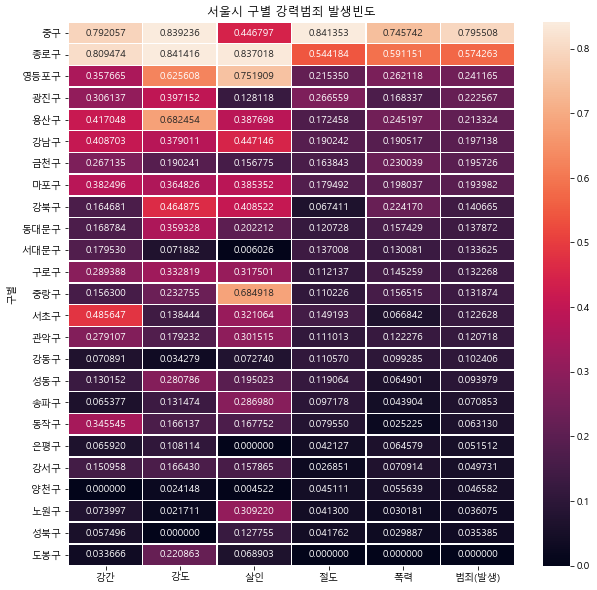

In [159]:
plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='범죄(발생)', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('서울시 구별 강력범죄 발생빈도')
plt.show()

In [160]:

target_col = ['강간', '강도', '살인', '절도', '폭력','범죄(발생)']
frame_temp = frame_by_gu[target_col].div(frame_by_gu['인구수'],axis=0)
max_column = frame_temp.max() # vector
min_column = frame_temp.min()
crime_count_norm = (frame_temp - min_column)/max_column
crime_count_norm.head()

,강간,강도,살인,절도,폭력,범죄(발생)
구별,,,,,,
강남구,0.408703,0.379011,0.447146,0.190242,0.190517,0.197138
강동구,0.070891,0.034279,0.072740,0.110570,0.099285,0.102406
강북구,0.164681,0.464875,0.408522,0.067411,0.224170,0.140665
강서구,0.150958,0.166430,0.157865,0.026851,0.070914,0.049731
관악구,0.279107,0.179232,0.301515,0.111013,0.122276,0.120718


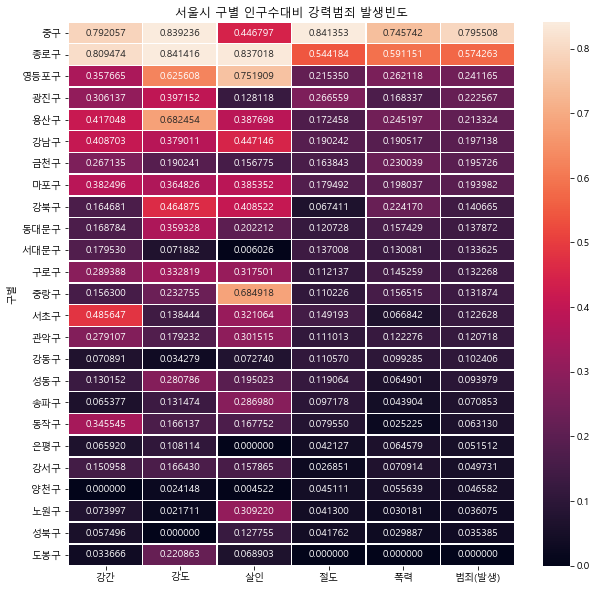

In [161]:

plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='범죄(발생)', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('서울시 구별 인구수대비 강력범죄 발생빈도')
plt.show()

In [148]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
geo_path='C:/Users/ASIA_08/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = frame_by_gu['살인'],
               columns = [frame_by_gu.index, frame_by_gu['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map